# Transaction Dataset 분석 & 모델링
- Random Forest Modeling 
- Dataset 설명
    - 거래내역 & 고객 dataset

## STEP1. 모듈 & DATASET 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mem = pd.read_csv('./member.csv')
tran = pd.read_csv('./transaction.csv')

In [3]:
mem.shape, tran.shape

((64000, 6), (196836, 3))

In [4]:
mem.head()

,id,recency,zip_code,is_referral,channel,conversion
0,906145,10,Surburban,0,Phone,0
1,184478,6,Rural,1,Web,0
2,394235,7,Surburban,1,Web,0
3,130152,9,Rural,1,Web,0
4,940352,2,Urban,0,Web,0


In [5]:
mem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           64000 non-null  int64 
 1   recency      64000 non-null  int64 
 2   zip_code     64000 non-null  object
 3   is_referral  64000 non-null  int64 
 4   channel      64000 non-null  object
 5   conversion   64000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.9+ MB


In [6]:
mem.describe()

,id,recency,is_referral,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000
mean,550694.137797,5.763734,0.502250,0.146781
std,259105.689773,3.507592,0.499999,0.353890
min,100001.000000,1.000000,0.000000,0.000000
25%,326772.000000,2.000000,0.000000,0.000000
50%,551300.000000,6.000000,1.000000,0.000000
75%,774914.500000,9.000000,1.000000,0.000000
max,999997.000000,12.000000,1.000000,1.000000


In [8]:
tran.head()

,id,num_item,total_amount
0,906145,5,34000
1,906145,1,27000
2,906145,4,33000
3,184478,4,29000
4,394235,4,33000


In [9]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196836 entries, 0 to 196835
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            196836 non-null  int64
 1   num_item      196836 non-null  int64
 2   total_amount  196836 non-null  int64
dtypes: int64(3)
memory usage: 4.5 MB


In [10]:
tran.describe()

,id,num_item,total_amount
count,196836.000000,196836.000000,196836.000000
mean,550557.552932,3.078365,21837.102969
std,259254.795613,1.478408,8218.005565
min,100001.000000,1.000000,8000.000000
25%,326719.000000,2.000000,15000.000000
50%,550918.000000,3.000000,22000.000000
75%,774916.000000,4.000000,29000.000000
max,999997.000000,6.000000,38000.000000


In [11]:
# 아이템별 평균 가격 확인
tran['total_amount'] / tran['num_item']

0          6800.000000
1         27000.000000
2          8250.000000
3          7250.000000
4          8250.000000
              ...     
196831     4800.000000
196832     5200.000000
196833     7333.333333
196834     6000.000000
196835     6666.666667
Length: 196836, dtype: float64

In [12]:
tran['avg_price'] = tran['total_amount'] / tran['num_item']

In [13]:
tran.head()

,id,num_item,total_amount,avg_price
0,906145,5,34000,6800.0
1,906145,1,27000,27000.0
2,906145,4,33000,8250.0
3,184478,4,29000,7250.0
4,394235,4,33000,8250.0


## STEP2. Merge Data

In [15]:
# GroupBy를 활용하여 id별로 1줄 데이터 요약
train_mean = tran.groupby('id').mean()

In [16]:
tran_cnt = tran['id'].value_counts()

In [17]:
tran_cnt

940317    5
754878    5
808126    5
876005    5
538399    5
         ..
781792    1
579795    1
806627    1
803008    1
586290    1
Name: id, Length: 64000, dtype: int64

In [18]:
tran_df = pd.concat([train_mean, tran_cnt], axis=1)

In [19]:
tran_df

,num_item,total_amount,avg_price,id
100001,3.500000,26000.000000,7500.000000,2
100008,5.000000,26000.000000,5200.000000,1
100032,2.666667,20666.666667,9366.666667,3
100036,3.000000,25800.000000,13273.333333,5
100070,3.250000,21250.000000,8537.500000,4
...,...,...,...,...
999932,5.000000,32000.000000,6400.000000,1
999981,2.000000,22750.000000,12875.000000,4
999990,3.000000,28000.000000,10388.888889,3
999995,2.000000,27000.000000,13500.000000,1


In [20]:
tran_df.columns = ['num_item', 'total_amount', 'avg_price', 'count']

In [22]:
tran_df

,num_item,total_amount,avg_price,count
100001,3.500000,26000.000000,7500.000000,2
100008,5.000000,26000.000000,5200.000000,1
100032,2.666667,20666.666667,9366.666667,3
100036,3.000000,25800.000000,13273.333333,5
100070,3.250000,21250.000000,8537.500000,4
...,...,...,...,...
999932,5.000000,32000.000000,6400.000000,1
999981,2.000000,22750.000000,12875.000000,4
999990,3.000000,28000.000000,10388.888889,3
999995,2.000000,27000.000000,13500.000000,1


In [23]:
mem

,id,recency,zip_code,is_referral,channel,conversion
0,906145,10,Surburban,0,Phone,0
1,184478,6,Rural,1,Web,0
2,394235,7,Surburban,1,Web,0
3,130152,9,Rural,1,Web,0
4,940352,2,Urban,0,Web,0
...,...,...,...,...,...,...
63995,838295,10,Urban,0,Web,0
63996,547316,5,Urban,1,Phone,0
63997,131575,6,Urban,1,Phone,0
63998,603659,1,Surburban,1,Multichannel,0


In [24]:
mem.set_index('id', inplace=True)

In [25]:
mem

,recency,zip_code,is_referral,channel,conversion
id,,,,,
906145,10,Surburban,0,Phone,0
184478,6,Rural,1,Web,0
394235,7,Surburban,1,Web,0
130152,9,Rural,1,Web,0
940352,2,Urban,0,Web,0
...,...,...,...,...,...
838295,10,Urban,0,Web,0
547316,5,Urban,1,Phone,0
131575,6,Urban,1,Phone,0


In [26]:
mem.join(tran_df)

,recency,zip_code,is_referral,channel,conversion,num_item,total_amount,avg_price,count
id,,,,,,,,,
906145,10,Surburban,0,Phone,0,3.333333,31333.333333,14016.666667,3
184478,6,Rural,1,Web,0,4.000000,29000.000000,7250.000000,1
394235,7,Surburban,1,Web,0,4.000000,20500.000000,5125.000000,2
130152,9,Rural,1,Web,0,1.750000,20750.000000,14875.000000,4
940352,2,Urban,0,Web,0,3.000000,31000.000000,10333.333333,1
...,...,...,...,...,...,...,...,...,...
838295,10,Urban,0,Web,0,3.500000,26000.000000,8012.500000,4
547316,5,Urban,1,Phone,0,1.800000,17800.000000,11300.000000,5
131575,6,Urban,1,Phone,0,4.000000,30500.000000,7833.333333,2


In [27]:
data = mem.join(tran_df)

## STEP3. Missing Value 확인

In [28]:
data.isna().sum() / len(data)

recency         0.0
zip_code        0.0
is_referral     0.0
channel         0.0
conversion      0.0
num_item        0.0
total_amount    0.0
avg_price       0.0
count           0.0
dtype: float64

## STEP4. 카테고리 데이터 처리

In [29]:
data['zip_code'].nunique()

3

In [30]:
data['zip_code'].unique()

array(['Surburban', 'Rural', 'Urban'], dtype=object)

In [31]:
data['channel'].nunique()

3

In [32]:
data['channel'].unique()

array(['Phone', 'Web', 'Multichannel'], dtype=object)

In [33]:
data = pd.get_dummies(data, columns=['zip_code', 'channel'], drop_first=True)

In [34]:
data.head()

,recency,is_referral,conversion,num_item,total_amount,avg_price,count,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
id,,,,,,,,,,,
906145,10,0,0,3.333333,31333.333333,14016.666667,3,1,0,1,0
184478,6,1,0,4.000000,29000.000000,7250.000000,1,0,0,0,1
394235,7,1,0,4.000000,20500.000000,5125.000000,2,1,0,0,1
130152,9,1,0,1.750000,20750.000000,14875.000000,4,0,0,0,1
940352,2,0,0,3.000000,31000.000000,10333.333333,1,0,1,0,1


## STEP5. Random Forest Modeling

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('conversion', axis=1), data['conversion'], test_size=0.3, random_state=100)

In [37]:
model = RandomForestClassifier(max_depth=10, random_state = 100)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=100)

## STEP6. 예측 및 평가

In [38]:
pred = model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [41]:
accuracy_score(y_test, pred), confusion_matrix(y_test, pred)

(0.87515625,
 array([[16403,    60],
        [ 2337,   400]], dtype=int64))

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     16463
           1       0.87      0.15      0.25      2737

    accuracy                           0.88     19200
   macro avg       0.87      0.57      0.59     19200
weighted avg       0.87      0.88      0.83     19200



## STEP7. Random Forest Regressor로 확률 예측

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rf = RandomForestRegressor(max_depth=10, random_state=100)

In [46]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=100)

In [47]:
pred = rf.predict(X_test)

In [48]:
pred

array([0.        , 0.05858361, 0.        , ..., 0.11632305, 0.        ,
       0.05458311])

## STEP8. 0~1 사이의 연속형 변수(확률값)를 0과 1로 변환

In [49]:
def conv(x):
    if x >= 0.5:
         return 1
    else:
        return 0

In [50]:
pd_result = pd.Series(pred).apply(lambda x: conv(x))

In [51]:
pd_result

0        0
1        0
2        0
3        1
4        0
        ..
19195    0
19196    0
19197    0
19198    0
19199    0
Length: 19200, dtype: int64

In [60]:
result_comp = [1 if x >= 0.15 else 0 for x in pred]

In [ ]:
result_comp

In [61]:
accuracy_score(y_test, result_comp)

0.70078125

In [56]:
print(classification_report(y_test, result_comp))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     16463
           1       0.80      0.21      0.34      2737

    accuracy                           0.88     19200
   macro avg       0.84      0.60      0.63     19200
weighted avg       0.87      0.88      0.85     19200



In [62]:
print(classification_report(y_test, result_comp))

              precision    recall  f1-score   support

           0       0.93      0.70      0.80     16463
           1       0.28      0.69      0.40      2737

    accuracy                           0.70     19200
   macro avg       0.61      0.70      0.60     19200
weighted avg       0.84      0.70      0.74     19200



## STEP9. 변수 중요성(Feature importances)

In [63]:
rf.feature_importances_

array([0.04990395, 0.02138491, 0.37591972, 0.1396865 , 0.23017582,
       0.16508618, 0.00303231, 0.00371579, 0.00697822, 0.0041166 ])

In [64]:
X_train.columns

Index(['recency', 'is_referral', 'num_item', 'total_amount', 'avg_price',
       'count', 'zip_code_Surburban', 'zip_code_Urban', 'channel_Phone',
       'channel_Web'],
      dtype='object')

<AxesSubplot:>

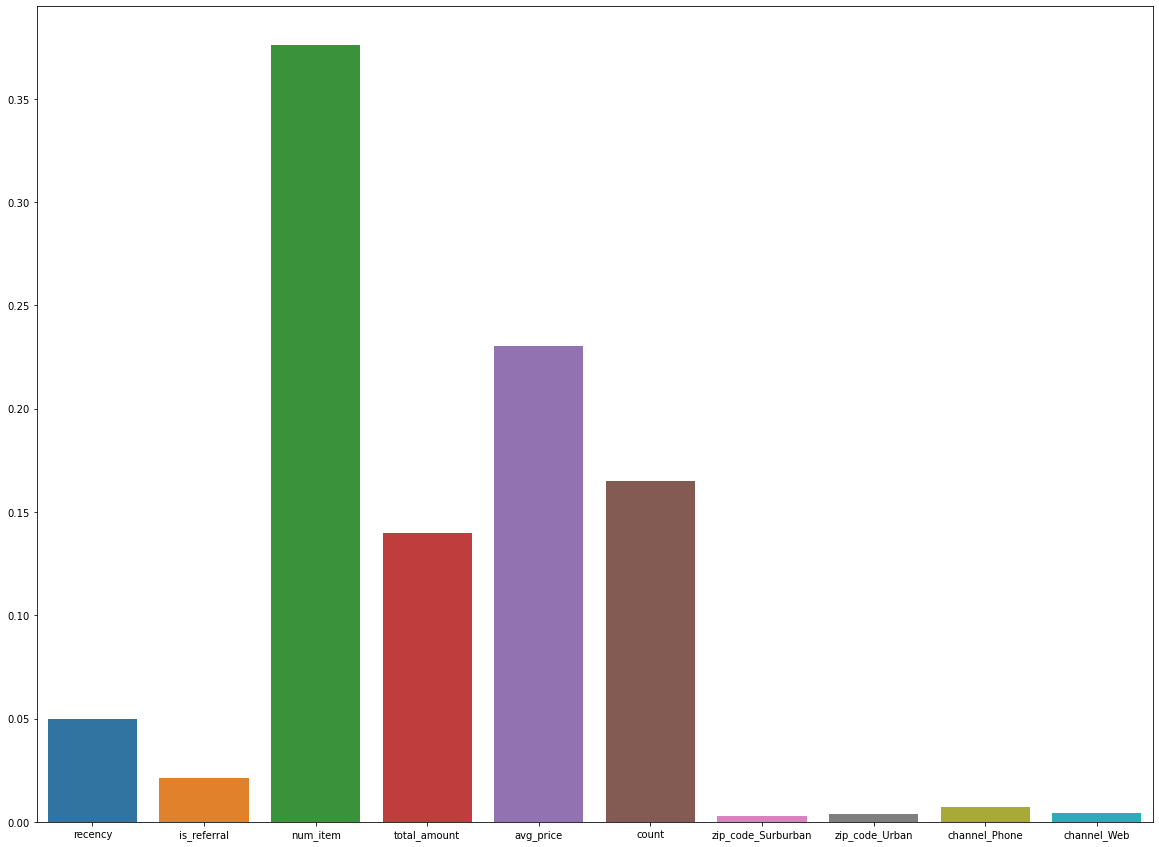

In [65]:
plt.figure(figsize=(20, 15))
sns.barplot(x = X_train.columns, y = rf.feature_importances_)